In [2]:
### Wine Quality
### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine
### Input variables (based on physicochemical tests):
"""
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 
Output variable (based on sensory data): 
12 - quality (score between 0 and 10)
"""

### As this is a classification Problem so i have used 
### Random forest classifier 
### Stochastic Gradient Descent Classifier
### Support Vector Classifier(SVC)

'1 - fixed acidity \n2 - volatile acidity \n3 - citric acid \n4 - residual sugar \n5 - chlorides \n6 - free sulfur dioxide \n7 - total sulfur dioxide \n8 - density \n9 - pH \n10 - sulphates \n11 - alcohol \nOutput variable (based on sensory data): \n12 - quality (score between 0 and 10)'

In [117]:
### Importing Required Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,roc_curve,precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [118]:
df_wine =  pd.read_csv('C:/Users/singh/Desktop/python Proj/winequality-red.csv')

In [119]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
null_counts = df_wine.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

##No Null values present 

Series([], dtype: int64)

In [121]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


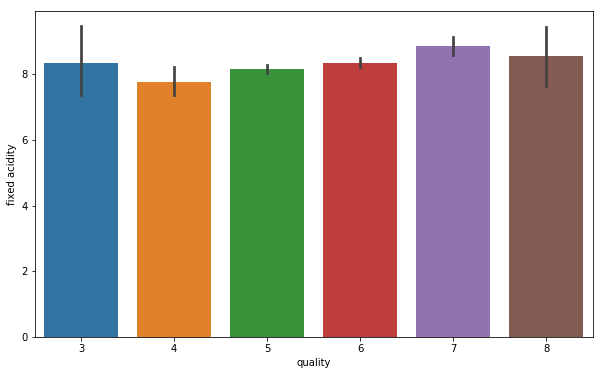

In [122]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_wine)

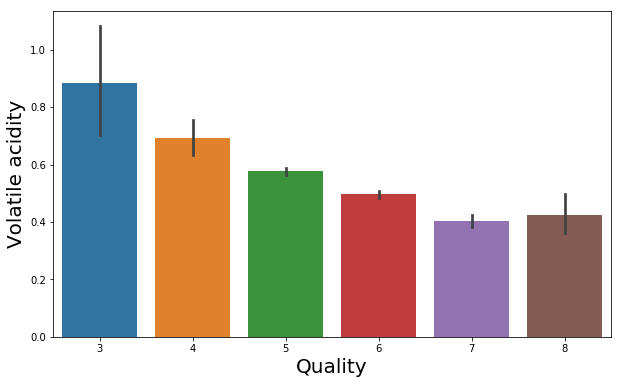

In [123]:
#Here we see that volatile acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
ax= sns.barplot(x = 'quality', y = 'volatile acidity', data = df_wine)
ax.set_xlabel('Quality',fontsize=20);
ax.set_ylabel('Volatile acidity',fontsize=20);

Text(0,0.5,'Alcohol')

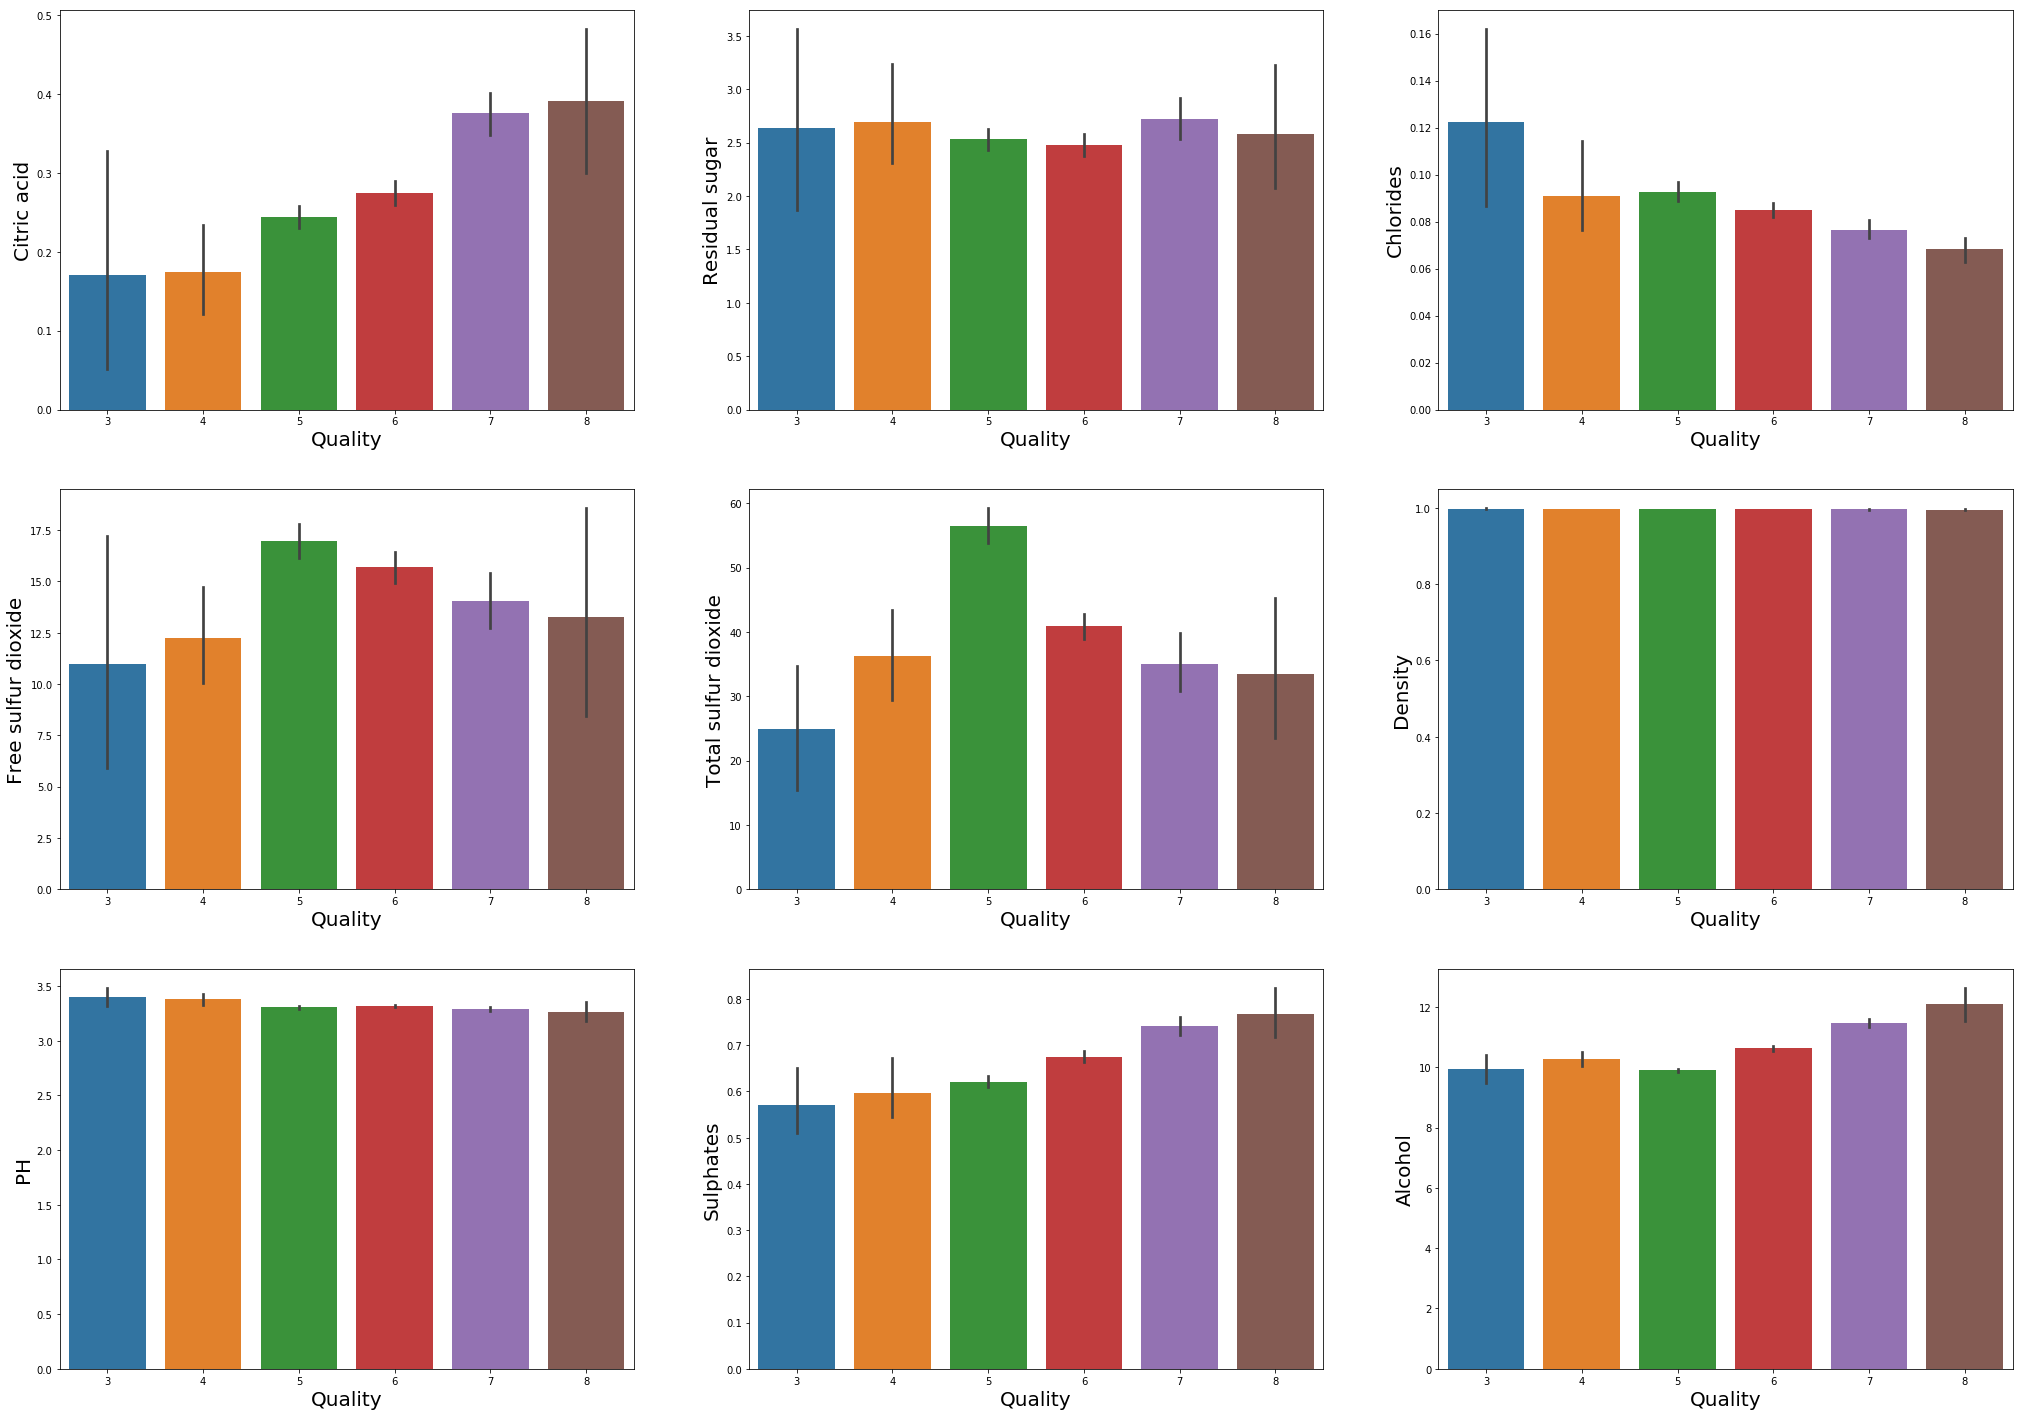

In [125]:
plt.figure(figsize=(35,25))
plt.subplot(3, 3, 1)
#fig = plt.figure(figsize = (10,6))
ax1= sns.barplot(x = 'quality', y = 'citric acid', data = df_wine)
ax1.set_xlabel('Quality',fontsize=20);
ax1.set_ylabel('Citric acid',fontsize=20);

plt.subplot(3, 3, 2)
#fig = plt.figure(figsize = (10,6))
ax2 = sns.barplot(x = 'quality', y = 'residual sugar', data = df_wine)
ax2.set_xlabel('Quality',fontsize=20);
ax2.set_ylabel('Residual sugar',fontsize=20);

plt.subplot(3, 3, 3)
#fig = plt.figure(figsize = (10,6))
ax3= sns.barplot(x = 'quality', y = 'chlorides', data = df_wine)
ax3.set_xlabel('Quality',fontsize=20);
ax3.set_ylabel('Chlorides',fontsize=20);

plt.subplot(3, 3, 4)
#fig = plt.figure(figsize = (10,6))
ax4= sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df_wine)
ax4.set_xlabel('Quality',fontsize=20);
ax4.set_ylabel('Free sulfur dioxide',fontsize=20)

plt.subplot(3, 3, 5)
#fig = plt.figure(figsize = (10,6))
ax5=sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df_wine)
ax5.set_xlabel('Quality',fontsize=20);
ax5.set_ylabel('Total sulfur dioxide',fontsize=20)

plt.subplot(3, 3, 6)
#fig = plt.figure(figsize = (10,6))
ax6=sns.barplot(x = 'quality', y = 'density', data = df_wine)
ax6.set_xlabel('Quality',fontsize=20);
ax6.set_ylabel('Density',fontsize=20)

plt.subplot(3, 3, 7)
#fig = plt.figure(figsize = (10,6))
ax7=sns.barplot(x = 'quality', y = 'pH', data = df_wine)
ax7.set_xlabel('Quality',fontsize=20);
ax7.set_ylabel('PH',fontsize=20)



plt.subplot(3, 3, 8)
#fig = plt.figure(figsize = (10,6))
ax8=sns.barplot(x = 'quality', y = 'sulphates', data = df_wine)
ax8.set_xlabel('Quality',fontsize=20);
ax8.set_ylabel('Sulphates',fontsize=20)


plt.subplot(3, 3, 9)
#fig = plt.figure(figsize = (10,6))
ax9=sns.barplot(x = 'quality', y = 'alcohol', data = df_wine)
ax9.set_xlabel('Quality',fontsize=20);
ax9.set_ylabel('Alcohol',fontsize=20)

In [ ]:
### Quality Increases as the amount of citric acid increases
### Hard to define any trend based on Sugar
### less the chloride better is the quality 
###We can observe that Density and is common that means density and is not playing any role
### More the sulphate better is the quality 

In [32]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_wine['quality'] = pd.cut(df_wine['quality'],bins=bins,labels=group_names)



In [33]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [126]:
lab = LabelEncoder()
df_wine['quality']= lab.fit_transform(df_wine['quality'])
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [42]:
df_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

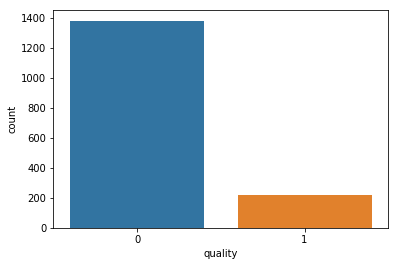

In [52]:
sns.countplot(x='quality',data=df_wine)

In [ ]:
### Most of the wine quantity falls under 0 

In [59]:
X = df_wine.drop(['quality'],axis=1)
y= df_wine['quality']

In [60]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [61]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [62]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [64]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [65]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [67]:
# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [68]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [74]:

from sklearn.metrics import precision_score,recall_score,confusion_matrix
import itertools

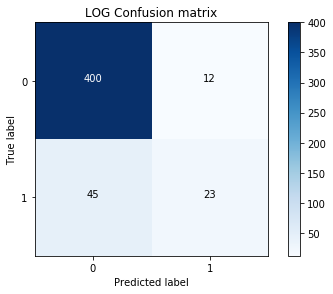

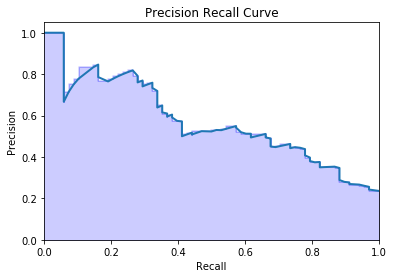

In [96]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
y_score = rfc.predict_proba(X_test)[:,1]


cm = confusion_matrix(y_test, pred_rfc)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()



# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [78]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       412
          1       0.65      0.35      0.46        68

avg / total       0.86      0.88      0.87       480



In [109]:
from sklearn.metrics import accuracy_score
x_rfc = accuracy_score(y_test, pred_rfc, normalize=True, sample_weight=None)
print("Accuracy of random forest :",x_rfc)

Accuracy of random forest : 0.88125


C:\Users\singh\Anaconda4\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


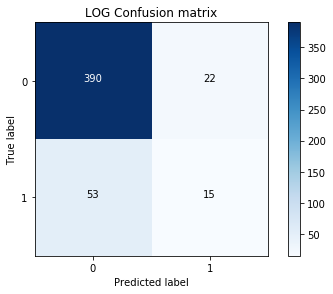

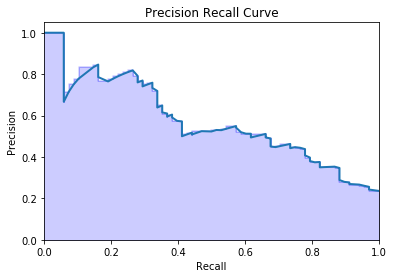

In [106]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

cm = confusion_matrix(y_test, pred_sgd)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()


# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [110]:
print(classification_report(y_test, pred_sgd))
from sklearn.metrics import accuracy_score
x= accuracy_score(y_test, pred_sgd, normalize=True, sample_weight=None)
print("Accuracy of Stochastic Gradient Descent Classifier: ",x)

             precision    recall  f1-score   support

          0       0.88      0.95      0.91       412
          1       0.41      0.22      0.29        68

avg / total       0.81      0.84      0.82       480

Accuracy of Stochastic Gradient Descent Classifier:  0.84375


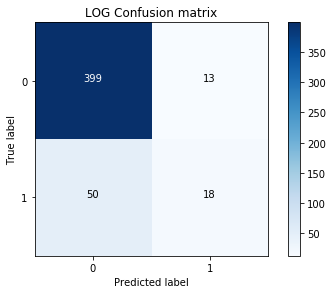

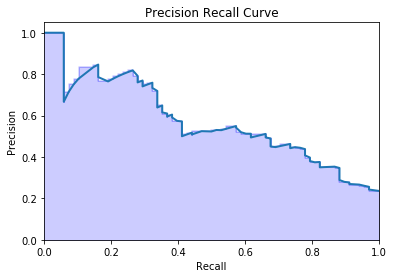

In [103]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

cm = confusion_matrix(y_test, pred_svc)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()


# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [112]:
print(classification_report(y_test, pred_svc))
from sklearn.metrics import accuracy_score
x_svc= accuracy_score(y_test, pred_svc, normalize=True, sample_weight=None)
print("Accuracy of Support Vector Classifier(SVC) ",x_svc)

             precision    recall  f1-score   support

          0       0.89      0.97      0.93       412
          1       0.58      0.26      0.36        68

avg / total       0.85      0.87      0.85       480

Accuracy of Support Vector Classifier(SVC)  0.86875
